## Deteksi Kendaraan Dengan Membedakannya Menjadi 4 Class

### DataSet : https://universe.roboflow.com/universitas-pakuan/kendaraan-cbyfz

### Install dan Menyiapkan Liblary

In [ ]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 657.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 49.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 3.1 MB/s eta 0:00:00
  Created wheel for lit: filename=lit-15.0.7-py3-none-any.whl size=89987 sha256=3b0806c397621c1961f399c163b892ecb6f9b588e1564eba0191dbad2fb0ee51
  Stored in directory: /root/.cache/pip/wheels/27/2c/b6/3ed2983b1b

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16531, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 16531 (delta 1), reused 5 (delta 0), pack-reused 16522
Receiving objects: 100% (16531/16531), 15.05 MiB | 16.31 MiB/s, done.
Resolving deltas: 100% (11354/11354), done.


In [ ]:
%cd yolov5
%pip install -r requirements.txt

/content/yolov5


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7M8WhZzTxNYYUuYmZ3NR")
project = rf.workspace("universitas-pakuan").project("kendaraan-cbyfz")
dataset = project.version(10).download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Kendaraan-10 in yolov5pytorch:: 100%|██████████| 4903/4903 [00:01<00:00, 3064.26it/s]


In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
import time
import pandas as pd

### Preprocessing Data

In [ ]:
os.listdir('/content/yolov5/Kendaraan-10')

['README.dataset.txt', 'train', 'README.roboflow.txt', 'valid', 'data.yaml']

In [ ]:
lenTrainImg = os.listdir('/content/yolov5/Kendaraan-10/train/images')
lenValidImg = os.listdir('/content/yolov5/Kendaraan-10/valid/images')
lenTrainLabel = os.listdir('/content/yolov5/Kendaraan-10/train/labels')
lenValidLabel = os.listdir('/content/yolov5/Kendaraan-10/valid/labels')
file_train = []
file_valid = []
label_train = []
label_valid = []
train_count_label = []
train_count = []
valid_count = []
format = ('.jpg','.png','.jpeg','.JPG')
for i in lenTrainImg:
    if i.endswith(format):
        file_train.append(i)
        train_count = int(len(file_train))

for j in lenValidImg:
    if j.endswith(format):
        file_valid.append(i)
        valid_count = int(len(file_valid))

for i in lenTrainLabel:
    if i.endswith('.txt'):
        label_train.append(i)
        train_count_label = int(len(label_train))

for j in lenValidLabel:
    if j.endswith('.txt'):
        label_valid.append(i)
        valid_count_label = int(len(label_valid))

print('jumlah train sample gambar : {}'.format(train_count))
print('jumlah validation sample gambar : {}'.format(valid_count))
print('total gambar :',int(train_count + valid_count))
print()
print('jumlah train label  : {}'.format(train_count_label))
print('jumlah val label : {}'.format(valid_count_label))
print('total label gambar :',int(train_count_label + valid_count_label))

jumlah train sample gambar : 1964
jumlah validation sample gambar : 483
total gambar : 2447

jumlah train label  : 1964
jumlah val label : 483
total label gambar : 2447


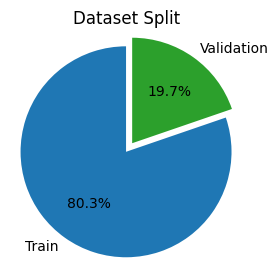

In [ ]:
%matplotlib inline
label= ['Train','Validation']
colors=['tab:blue', 'tab:green']
myexplode = [0.1, 0]
fig1, ax1 = plt.subplots(figsize=(3, 3))
data = [int(len(file_train)),int(len(file_valid))]
# data = [int(len(label_train)),int(len(label_valid))]
plt.pie(data, labels=label, autopct='%1.1f%%', startangle=90, colors=colors,explode = myexplode)
plt.title('Dataset Split')
ax1.axis('equal')
plt.show()

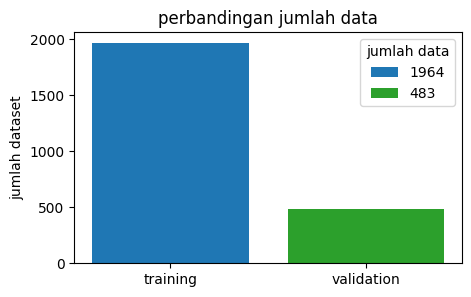

In [ ]:
%matplotlib inline
fig2,ax2 = plt.subplots(figsize=(5, 3))

datasplit = ['training', 'validation']
counts_dataset =  [train_count,valid_count]
bar_labels = [train_count,valid_count]
bar_colors = ['tab:blue','tab:green']

ax2.bar(datasplit, counts_dataset,label=bar_labels, color=bar_colors)
ax2.set_ylabel('jumlah dataset')
ax2.set_title('perbandingan jumlah data')
ax2.legend(title='jumlah data')
plt.show()

In [ ]:
import uuid #unique identifier

In [ ]:
IMAGES_PATH = os.path.join('dataset','train') #data/train_images
labels = ['bus','mobil','motor','truk']
number_imgs = 20

In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

dataset/train/bus.5288a6d2-fa0c-11ee-8d61-0242ac1c000c.jpg


In [ ]:
for label in labels:
    print('collecting images for {} . . .' .format(label))
    time.sleep(5)

    #loop through image range
    for img_num in range(number_imgs):
            print('collecting images for {}, image number {}' .format(label, img_num))
            imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
            print(imgname)

collecting images for bus . . .
collecting images for bus, image number 0
dataset/train/bus.5586ab86-fa0c-11ee-8d61-0242ac1c000c.jpg
collecting images for bus, image number 1
dataset/train/bus.5586b090-fa0c-11ee-8d61-0242ac1c000c.jpg
collecting images for bus, image number 2
dataset/train/bus.5586b37e-fa0c-11ee-8d61-0242ac1c000c.jpg
collecting images for bus, image number 3
dataset/train/bus.5586b64e-fa0c-11ee-8d61-0242ac1c000c.jpg
collecting images for bus, image number 4
dataset/train/bus.5586b928-fa0c-11ee-8d61-0242ac1c000c.jpg
collecting images for bus, image number 5
dataset/train/bus.5586bc8e-fa0c-11ee-8d61-0242ac1c000c.jpg
collecting images for bus, image number 6
dataset/train/bus.5586bf4a-fa0c-11ee-8d61-0242ac1c000c.jpg
collecting images for bus, image number 7
dataset/train/bus.5586c1e8-fa0c-11ee-8d61-0242ac1c000c.jpg
collecting images for bus, image number 8
dataset/train/bus.5586c486-fa0c-11ee-8d61-0242ac1c000c.jpg
collecting images for bus, image number 9
dataset/train/bus

In [ ]:
for label in labels:
    print(label)

bus
mobil
motor
truk


In [ ]:
model_base = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True )
model_base

You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-4-14 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 43.3MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [ ]:
#train command object detection using dataset regular yolov5s
!cd yolov5 && python train.py --img 640 --batch 32 --epochs 150 --data dataset.yaml --weights yolov5s.pt --hyp hyp.scratch-low.yaml --workers 2 --optimizer SGD  --cache

2024-04-14 03:09:56.543534: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-14 03:09:56.543595: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-14 03:09:56.545241: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=hyp.scratch-low.yaml, epochs=150, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SG

In [ ]:
# Tensorboard
%load_ext tensorboard
%tensorboard --logdir

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2024-04-14 04:40:52.756572: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-14 04:40:52.756663: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-14 04:40:52.858834: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC] [--host ADDR]
                   [--bind_all] [--port PORT] [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_cre

### MEMUAT CUSTOM MODEL

In [ ]:
custom_model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/exp/weights/last.pt', force_reload=True, trust_repo=True)
custom_model.eval()

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-4-14 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [ ]:
train_result = pd.read_csv('/content/yolov5/runs/train/exp/results.csv')
pd.set_option('display.max_rows', None)
train_result.head(10)
# train_result

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,...,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.091827,0.074782,0.035702,0.33537,...,0.051038,0.025205,0.070484,0.003280,0.003280
1,1,0.067609,0.060891,0.021118,0.35633,...,0.034850,0.017943,0.040440,0.006569,0.006569
2,2,0.065275,0.057700,0.016686,0.47258,...,0.035494,0.013458,0.010353,0.009815,0.009815
3,3,0.056585,0.055827,0.012535,0.68916,...,0.035217,0.010549,0.009802,0.009802,0.009802
4,4,0.049665,0.054980,0.010403,0.74085,...,0.034728,0.009136,0.009802,0.009802,0.009802
5,5,0.046278,0.055839,0.009144,0.81121,...,0.034590,0.009012,0.009736,0.009736,0.009736
6,6,0.043439,0.052492,0.008225,0.80112,...,0.034386,0.008973,0.009670,0.009670,0.009670
7,7,0.042575,0.054063,0.007686,0.84872,...,0.033783,0.007319,0.009604,0.009604,0.009604
8,8,0.040560,0.051756,0.007267,0.79578,...,0.033122,0.007561,0.009538,0.009538,0.009538
9,9,0.040538,0.051171,0.006958,0.85072,...,0.033047,0.006731,0.009472,0.009472,0.009472


In [ ]:
#check data
train_result.isnull().sum()

               epoch    0
      train/box_loss    0
      train/obj_loss    0
      train/cls_loss    0
   metrics/precision    0
      metrics/recall    0
     metrics/mAP_0.5    0
metrics/mAP_0.5:0.95    0
        val/box_loss    0
        val/obj_loss    0
        val/cls_loss    0
               x/lr0    0
               x/lr1    0
               x/lr2    0
dtype: int64

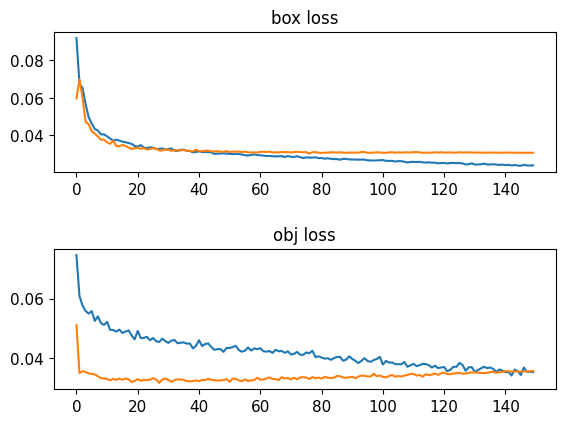

In [ ]:
%matplotlib inline
figure, axis3 = plt.subplots(2, 1)
figure.tight_layout(pad=3.0)

# plot 1
epochs= train_result['               epoch'].values
train_boxloss = train_result['      train/box_loss'].values
val_boxloss = train_result['        val/box_loss'].values
axis3[0].set_title('box loss', fontsize=12)
axis3[0].plot(epochs, train_boxloss, val_boxloss)

# plot 2
epochs= train_result['               epoch'].values
train_objloss = train_result['      train/obj_loss'].values
val_objloss = train_result['        val/obj_loss'].values
axis3[1].set_title('obj loss', fontsize=12)
axis3[1].plot(epochs, train_objloss, val_objloss)

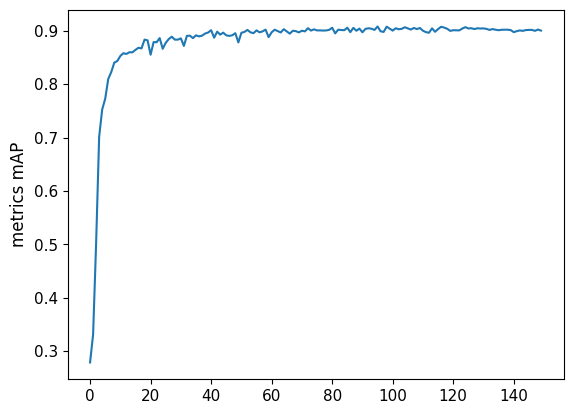

In [ ]:
%matplotlib inline
epochs= train_result['               epoch'].values
mAP = train_result['     metrics/mAP_0.5'].values
plt.ylabel('metrics mAP', fontsize=12)
plt.plot(epochs, mAP)
plt.show()

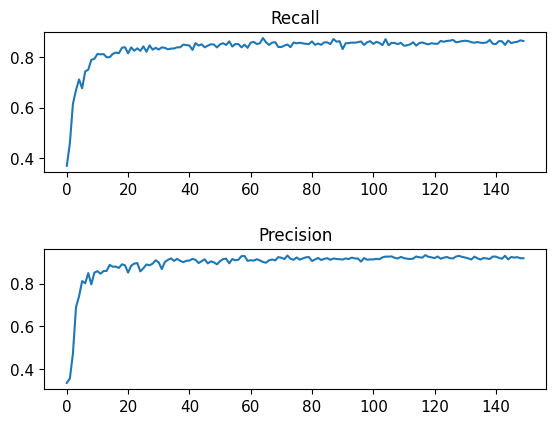

In [ ]:
%matplotlib inline
figure, axis4 = plt.subplots(2, 1)
figure.tight_layout(pad=3.0)

# plot 1
epochs= train_result['               epoch'].values
recall = train_result['      metrics/recall'].values
axis4[0].set_title('Recall', fontsize=12)
axis4[0].plot(epochs, recall)

# plot 2
epochs= train_result['               epoch'].values
precision = train_result['   metrics/precision'].values
axis4[1].set_title('Precision', fontsize=12)
axis4[1].plot(epochs, precision)

In [ ]:
!unzip "/content/assets.zip"

Archive:  /content/assets.zip
   creating: assets/
  inflating: assets/pagi.mp4         
  inflating: assets/sore.mp4         


In [ ]:
# import os

# img_path = '/content/assets/11 Dec - Pagi 7_00_mp4-27.jpg'

# if os.path.exists(img_path):
#     # Continue with your image processing code
#     print('continue')
# else:
#     print(f"Error: Image file not found at {img_path}")

In [ ]:
#uji coba model menggunakan gambar
img = os.path.join('/','content','assets', '11 Dec - Pagi 7_00_mp4-7.jpg')
print(img)

/content/assets/11 Dec - Pagi 7_00_mp4-7.jpg


In [ ]:
import cv2

# Path to your image file
img_path = '/content/assets/11 Dec - Pagi 7_00_mp4-7.jpg'

# Read the image
img = cv2.imread(img_path)


In [ ]:
results = custom_model(img)
results.print()

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
results.render()

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
#nilai xyxy menuju pada : xmin, ymin, xmax, ymax, confidence, class
results.xyxy

In [ ]:
np.array(results.render()).shape


In [ ]:
table_results = results.pandas().xyxy[0]
table_results

In [ ]:
table_results = results.pandas().xyxy[0].drop(columns= ['xmin', 'ymin', 'xmax', 'ymax', 'confidence', 'class'], axis =1)
table_results

In [ ]:
table_results["name"].values

In [ ]:
if 'motor' in table_results["name"].values:
    count_motor = table_results["name"].value_counts()['motor']
    print('motor: {}'.format(count_motor))
else:
    print('motor: {}'.format('-'))

if 'mobil' in table_results["name"].values:
    count_mobil = table_results["name"].value_counts()['mobil']
    print('mobil: {}'.format(count_mobil))
else:
    print('mobil: {}'.format('-'))

if 'bus' in table_results["name"].values:
    count_bus = table_results["name"].value_counts()['bus']
    print('bus: {}'.format(count_bus))
else:
    print('bus: {}'.format('-'))

if 'truk' in table_results["name"].values:
    count_truk = table_results["name"].value_counts()['truk']
    print('truk: {}'.format(count_truk))
else:
    print('truk: {}'.format('-'))

Real Time Detection



In [ ]:
!unzip "/content/assets.zip"

Archive:  /content/assets.zip
replace assets/pagi.mp4? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!cd yolov5 && python detect.py --source /content/yolov5/assets/sore.mp4 --weights /content/yolov5/runs/train/exp/weights/last.pt --img-size 640 --device 0

Streaming output truncated to the last 5000 lines.
video 1/1 (517/5514) /content/yolov5/assets/sore.mp4: 384x640 1 bus, 6 mobils, 3 motors, 9.9ms
video 1/1 (518/5514) /content/yolov5/assets/sore.mp4: 384x640 1 bus, 6 mobils, 3 motors, 12.4ms
video 1/1 (519/5514) /content/yolov5/assets/sore.mp4: 384x640 1 bus, 6 mobils, 3 motors, 10.0ms
video 1/1 (520/5514) /content/yolov5/assets/sore.mp4: 384x640 1 bus, 5 mobils, 2 motors, 8.1ms
video 1/1 (521/5514) /content/yolov5/assets/sore.mp4: 384x640 2 buss, 5 mobils, 2 motors, 8.0ms
video 1/1 (522/5514) /content/yolov5/assets/sore.mp4: 384x640 2 buss, 6 mobils, 3 motors, 8.2ms
video 1/1 (523/5514) /content/yolov5/assets/sore.mp4: 384x640 2 buss, 6 mobils, 3 motors, 11.0ms
video 1/1 (524/5514) /content/yolov5/assets/sore.mp4: 384x640 1 bus, 6 mobils, 3 motors, 11.4ms
video 1/1 (525/5514) /content/yolov5/assets/sore.mp4: 384x640 1 bus, 6 mobils, 3 motors, 9.3ms
video 1/1 (526/5514) /content/yolov5/assets/sore.mp4: 384x640 1 bus, 6 mobils, 3 motors

In [ ]:
!cd yolov5 && python detect.py --source /content/yolov5/assets/pagi.mp4 --weights /content/yolov5/runs/train/exp/weights/last.pt --img-size 640 --device 0

Streaming output truncated to the last 5000 lines.
video 1/1 (403/5400) /content/yolov5/assets/pagi.mp4: 384x640 2 buss, 15 mobils, 18 motors, 11.4ms
video 1/1 (404/5400) /content/yolov5/assets/pagi.mp4: 384x640 2 buss, 15 mobils, 17 motors, 9.8ms
video 1/1 (405/5400) /content/yolov5/assets/pagi.mp4: 384x640 2 buss, 15 mobils, 20 motors, 9.4ms
video 1/1 (406/5400) /content/yolov5/assets/pagi.mp4: 384x640 2 buss, 14 mobils, 17 motors, 9.4ms
video 1/1 (407/5400) /content/yolov5/assets/pagi.mp4: 384x640 2 buss, 15 mobils, 18 motors, 10.5ms
video 1/1 (408/5400) /content/yolov5/assets/pagi.mp4: 384x640 2 buss, 14 mobils, 17 motors, 11.7ms
video 1/1 (409/5400) /content/yolov5/assets/pagi.mp4: 384x640 2 buss, 14 mobils, 16 motors, 8.9ms
video 1/1 (410/5400) /content/yolov5/assets/pagi.mp4: 384x640 2 buss, 15 mobils, 18 motors, 8.7ms
video 1/1 (411/5400) /content/yolov5/assets/pagi.mp4: 384x640 2 buss, 16 mobils, 19 motors, 11.3ms
video 1/1 (412/5400) /content/yolov5/assets/pagi.mp4: 384x640 2